1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

**Based off of the results, there is only a significant difference in people's trust in Spain and Sweden in 2012 vs 2014. Interestingly enough, people in Spain have become less trust and people in Sweden have become more trusting.**

2) Did people become happier from 2012 to 2014? Compute results for each country in the sample.

**The only significant difference between happiness of people in 2012 vs 2014 was found in Norway. People were happier in 2012 than they were in 2014.**

3) Who reported watching more TV in 2012, men or women?

**There is no significant difference in time reported watching TV between men and women in 2012.**

4) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

**The test statistic showed that people that live with a partner are far more likely to trust other people.**

5) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

**There exists a significant difference in frequency of social meetings in 2014 between Switzerland and Czech Republic. But there is an even higher significant difference between Norway and either of them, having a highest average meetings of the three.**

6) Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

**There is no significant difference in the number of social meetings between Norway and Switzerland for those at or under the average age of participants. Both of them were significantly higher than the Czech Republic though.**

**Same result occurs for older individuals. There is no significant difference in the number of social meetings between Norway and Switzerland for those above the average age of participants. But, both of them were significantly higher than the Czech Republic.**

**In each country, those under or at the average participant age had significantly more social gatherings than those above the average partcipcant age. The highest difference in social gatherings by age existing in Switzerland.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('euro_social_survey.csv')

## Summaries of Data

In [3]:
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [4]:
# drop things for simplicity, I'd fill with median (probably)
df = df.dropna()

In [5]:
# df2 will be 2014 and df will be 2012
df2 = df[df.year ==7]
df = df[df.year == 6]

In [6]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [7]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,4.071000e+03,4071.0,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000,4071.000000
mean,3.889715e+04,6.0,3.882093,5.578482,5.996070,5.392778,7.731516,5.256939,2.745026,1.495701,47.326701,1.375583
std,6.205244e+05,0.0,2.008912,2.212022,2.118477,2.162271,1.755549,1.458116,0.912288,0.500043,18.161313,0.484333
min,1.000000e+00,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.0,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.757000e+03,6.0,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.776500e+03,6.0,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,6.0,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,103.000000,2.000000


In [8]:
df2.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,4.076000e+03,4076.0,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000
mean,4.155365e+04,7.0,3.755152,5.571394,6.014230,5.250245,7.685476,5.174926,2.766928,1.497056,47.197743,1.393768
std,6.434722e+05,0.0,2.007204,2.219723,2.121996,2.168076,1.685360,1.418223,0.890382,0.500053,18.472972,0.488644
min,1.000000e+00,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,7.0,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.740000e+03,7.0,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.782500e+03,7.0,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.0,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


2012


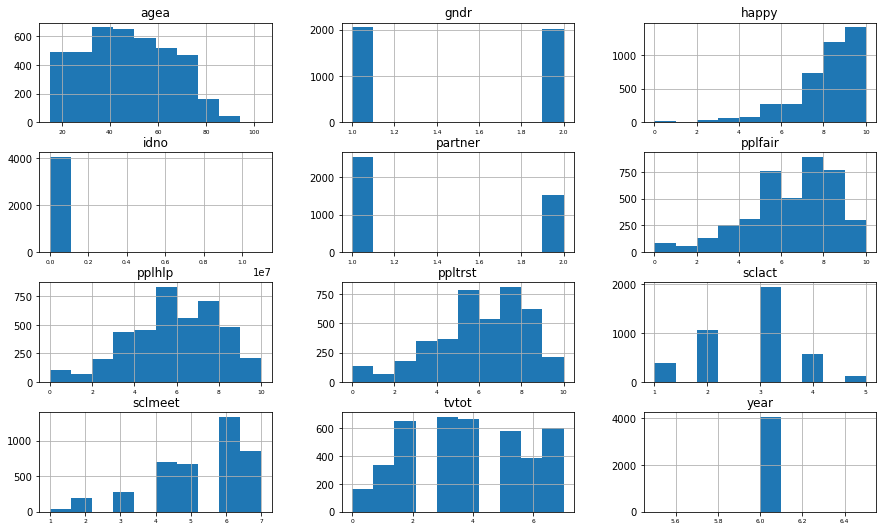

In [9]:
print('2012')
fig = df.hist(figsize=(15,9), xlabelsize=6)

2014


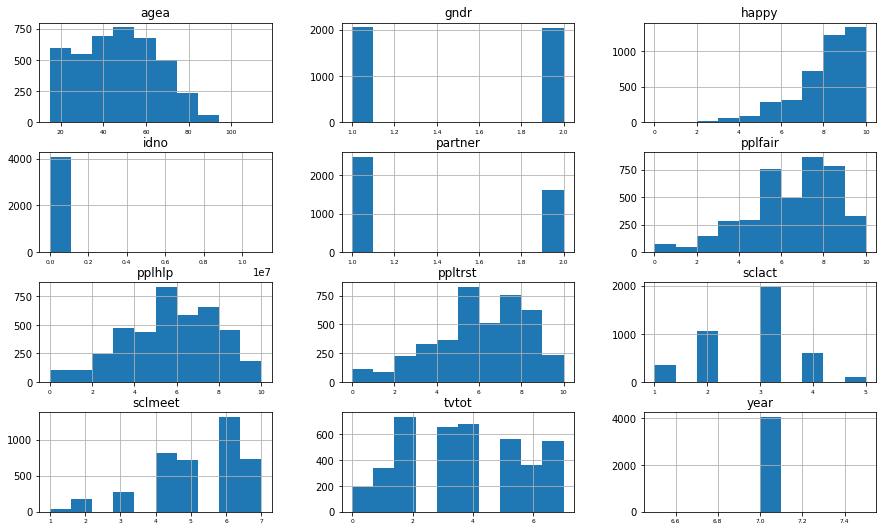

In [10]:
print('2014')
fig = df2.hist(figsize=(15,9), xlabelsize=6)

Based off what I can see, gindr, happy, pplhelp, ppltrst, tvtot, and year seems to be non-normal data. Some of the others might be a stretch to call normal, buit they're close.

In [11]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

## 1)

In [12]:
print('Trust:\n\nSwitzerland')
print(stats.ttest_ind(df.ppltrst[df.cntry == 'CH'], df2.ppltrst[df2.cntry == 'CH']))
print('\nCzech Republic')
print(stats.ttest_ind(df.ppltrst[df.cntry == 'CZ'], df2.ppltrst[df2.cntry == 'CZ']))
print('\nGermany')
print(stats.ttest_ind(df.ppltrst[df.cntry == 'DE'], df2.ppltrst[df2.cntry == 'DE']))
print('\nSpain')
print(stats.ttest_ind(df.ppltrst[df.cntry == 'ES'], df2.ppltrst[df2.cntry == 'ES']))
print('\nNorway')
print(stats.ttest_ind(df.ppltrst[df.cntry == 'NO'], df2.ppltrst[df2.cntry == 'NO']))
print('\nSweden')
print(stats.ttest_ind(df.ppltrst[df.cntry == 'SE'], df2.ppltrst[df2.cntry == 'SE']))

Trust:

Switzerland
Ttest_indResult(statistic=-0.7156974792217816, pvalue=0.4742916002909491)

Czech Republic
Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976)

Germany
Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732)

Spain
Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363)

Norway
Ttest_indResult(statistic=0.5119224181145228, pvalue=0.6087850218131977)

Sweden
Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.0428293634522298)


Based off of these results, there is only a significant difference in people's trust in Spain and Sweden in 2012 vs 2014. Interestingly enough, people in Spain have become less trust and people in Sweden have become more trusting.

## 2)

In [13]:
print('Happiness:\n\nSwitzerland')
print(stats.kruskal(df.happy[df.cntry == 'CH'], df2.happy[df2.cntry == 'CH']))
print('\nCzech Republic')
print(stats.kruskal(df.happy[df.cntry == 'CZ'], df2.happy[df2.cntry == 'CZ']))
print('\nGermany')
print(stats.kruskal(df.happy[df.cntry == 'DE'], df2.happy[df2.cntry == 'DE']))
print('\nSpain')
print(stats.kruskal(df.happy[df.cntry == 'ES'], df2.happy[df2.cntry == 'ES']))
print('\nNorway')
print(stats.kruskal(df.happy[df.cntry == 'NO'], df2.happy[df2.cntry == 'NO']))
print('\nSweden')
print(stats.kruskal(df.happy[df.cntry == 'SE'], df2.happy[df2.cntry == 'SE']))

Happiness:

Switzerland
KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511)

Czech Republic
KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901)

Germany
KruskalResult(statistic=0.7954545454545382, pvalue=0.3724558699813717)

Spain
KruskalResult(statistic=2.9615793608595036, pvalue=0.08526461865591295)

Norway
KruskalResult(statistic=17.78863118177249, pvalue=2.4685385809958533e-05)

Sweden
KruskalResult(statistic=0.10011450993142058, pvalue=0.7516922609168144)


Only significant difference between happiness of people in 2012 vs 2014 is in Norway. People were happier in 2012 than they were in 2014.

## 3)

In [14]:
print('TV in 2012, Men vs Women:')
# 1 is male, 2 is female
print(stats.kruskal(
    df.tvtot[df.gndr == 1.0],
    df.tvtot[df.gndr == 2.0]))

TV in 2012, Men vs Women:
KruskalResult(statistic=0.6145695087428265, pvalue=0.4330724786171142)


No significant difference in time reported watching TV between men and women in 2012.

## 4)

In [15]:
print('Belief people are fair in 2012, Partner vs no Partner:')
# 1 means live with partner, 2 means not
print(stats.ttest_ind(
    df.pplfair[df.partner == 1.0],
    df.pplfair[df.partner == 2.0]))

Belief people are fair in 2012, Partner vs no Partner:
Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)


Test statistic shows that people that live with a partner are far more likely to trust people.

## 5)

In [16]:
print('Differences in frequency of social gatherings in 2014:\n')
print('CH vs CZ')
print(stats.ttest_ind(
    df2.sclmeet[df2.cntry == 'CH'],
    df2.sclmeet[df2.cntry == 'CZ']))
print('\nCZ vs NO')
print(stats.ttest_ind(
    df2.sclmeet[df2.cntry == 'CZ'],
    df2.sclmeet[df2.cntry == 'NO']))
print('\nNO vs CH')
print(stats.ttest_ind(
    df2.sclmeet[df2.cntry == 'NO'],
    df2.sclmeet[df2.cntry == 'CH']))

Differences in frequency of social gatherings in 2014:

CH vs CZ
Ttest_indResult(statistic=8.998568888102158, pvalue=7.58694000913212e-19)

CZ vs NO
Ttest_indResult(statistic=-10.507796823715257, pvalue=7.427021134307074e-25)

NO vs CH
Ttest_indResult(statistic=1.9524600649137105, pvalue=0.05107541004946689)


In [17]:
print('Mean of meetings, to make sure statistics make sense\n(Switzerland, Czech Republic, Norway)')
print(df2.sclmeet[df2.cntry == 'CH'].mean(), 
    df2.sclmeet[df2.cntry == 'CZ'].mean(),
    df2.sclmeet[df2.cntry == 'NO'].mean())

Mean of meetings, to make sure statistics make sense
(Switzerland, Czech Republic, Norway)
5.174966352624495 4.4950495049504955 5.310393258426966


Significant difference in frequency of social meetings in 2014 between Switzerland and Czech Republic. But there is an even higher significant difference between Norway and either of them, having a higher average meetings than the others. 

In [18]:
# should've done this sooner, realized that Germany was a poor choice,
# having very few participants compared to other countries
# switch Norway (NO) as a third, close number of participats to CH and CZ
df2.groupby('cntry').cntry.count()

cntry
CH     743
CZ     606
DE      14
ES    1134
NO     712
SE     867
Name: cntry, dtype: int64

## 6)

In [19]:
print('Differences in frequency of social gatherings of those', 
      'at or below the average age of partipants in 2014:\n')
print('CH vs CZ')
print(stats.ttest_ind(
    df2.sclmeet[(df2.cntry == 'CH') & (df2.agea <= df2.agea.mean())],
    df2.sclmeet[(df2.cntry == 'CZ') & (df2.agea <= df2.agea.mean())]))
print('\nCZ vs NO')
print(stats.ttest_ind(
    df2.sclmeet[(df2.cntry == 'CZ') & (df2.agea <= df2.agea.mean())],
    df2.sclmeet[(df2.cntry == 'NO') & (df2.agea <= df2.agea.mean())]))
print('\nNO vs CH')
print(stats.ttest_ind(
    df2.sclmeet[(df2.cntry == 'NO') & (df2.agea <= df2.agea.mean())],
    df2.sclmeet[(df2.cntry == 'CH') & (df2.agea <= df2.agea.mean())]))

Differences in frequency of social gatherings of those at or below the average age of partipants in 2014:

CH vs CZ
Ttest_indResult(statistic=8.138677177030036, pvalue=1.734836768420487e-15)

CZ vs NO
Ttest_indResult(statistic=-8.376997891401201, pvalue=2.9491788883118074e-16)

NO vs CH
Ttest_indResult(statistic=1.057334956151466, pvalue=0.2906929463860797)


In [20]:
print('Mean of meetings for at or below average aged participants, to make sure statistics make sense\n(Switzerland, Czech Republic, Norway)')
print(df2.sclmeet[(df2.cntry == 'CH') & (df2.agea <= df2.agea.mean())].mean(), 
    df2.sclmeet[(df2.cntry == 'CZ') & (df2.agea <= df2.agea.mean())].mean(),
    df2.sclmeet[(df2.cntry == 'NO') & (df2.agea <= df2.agea.mean())].mean())

Mean of meetings for at or below average aged participants, to make sure statistics make sense
(Switzerland, Czech Republic, Norway)
5.415189873417722 4.60960960960961 5.512129380053908


No significant difference in number of social meetings between Norway and Switzerland for those at or under the average age of participants. Both of them were significantly higher than the Czech Republic though.

In [21]:
print('Differences in frequency of social gatherings of those', 
      'above the average age of partipants in 2014:\n')
print('CH vs CZ')
print(stats.ttest_ind(
    df2.sclmeet[(df2.cntry == 'CH') & (df2.agea > df2.agea.mean())],
    df2.sclmeet[(df2.cntry == 'CZ') & (df2.agea > df2.agea.mean())]))
print('\nCZ vs NO')
print(stats.ttest_ind(
    df2.sclmeet[(df2.cntry == 'CZ') & (df2.agea > df2.agea.mean())],
    df2.sclmeet[(df2.cntry == 'NO') & (df2.agea > df2.agea.mean())]))
print('\nNO vs CH')
print(stats.ttest_ind(
    df2.sclmeet[(df2.cntry == 'NO') & (df2.agea > df2.agea.mean())],
    df2.sclmeet[(df2.cntry == 'CH') & (df2.agea > df2.agea.mean())]))

Differences in frequency of social gatherings of those above the average age of partipants in 2014:

CH vs CZ
Ttest_indResult(statistic=4.812789101355405, pvalue=1.872342901628445e-06)

CZ vs NO
Ttest_indResult(statistic=-6.687369913453449, pvalue=5.1289003259054134e-11)

NO vs CH
Ttest_indResult(statistic=1.8477531873490438, pvalue=0.06506773171555376)


In [22]:
print('Mean of meetings for above average aged participants, to make sure statistics make sense\n(Switzerland, Czech Republic, Norway)')
print(df2.sclmeet[(df2.cntry == 'CH') & (df2.agea <= df2.agea.mean())].mean(), 
    df2.sclmeet[(df2.cntry == 'CZ') & (df2.agea <= df2.agea.mean())].mean(),
    df2.sclmeet[(df2.cntry == 'NO') & (df2.agea <= df2.agea.mean())].mean())

Mean of meetings for above average aged participants, to make sure statistics make sense
(Switzerland, Czech Republic, Norway)
5.415189873417722 4.60960960960961 5.512129380053908


Same. no significant difference in number of social meetings between Norway and Switzerland for those above the average age of participants. But, both of them were significantly higher than the Czech Republic.

In [23]:
print('Differences in frequency of social gatherings of those', 
      'above the average vs at or below age of partipants in 2014:\n')
print('Switzerland')
print(stats.ttest_ind(
    df2.sclmeet[(df2.cntry == 'CH') & (df2.agea <= df2.agea.mean())],
    df2.sclmeet[(df2.cntry == 'CH') & (df2.agea > df2.agea.mean())]))
print('\nCCzech Republic')
print(stats.ttest_ind(
    df2.sclmeet[(df2.cntry == 'CZ') & (df2.agea <= df2.agea.mean())],
    df2.sclmeet[(df2.cntry == 'CZ') & (df2.agea > df2.agea.mean())]))
print('\nNorway')
print(stats.ttest_ind(
    df2.sclmeet[(df2.cntry == 'NO') & (df2.agea <= df2.agea.mean())],
    df2.sclmeet[(df2.cntry == 'NO') & (df2.agea > df2.agea.mean())]))

Differences in frequency of social gatherings of those above the average vs at or below age of partipants in 2014:

Switzerland
Ttest_indResult(statistic=5.462469202194172, pvalue=6.415070214229491e-08)

CCzech Republic
Ttest_indResult(statistic=2.123212073245354, pvalue=0.0341420655426053)

Norway
Ttest_indResult(statistic=4.2267673550343465, pvalue=2.6802682207696762e-05)


In each country, those under or at the average participant age had significantly more social gatherings than those above the average partcipcant age. The highest difference existing in Switzerland.